Link for blogpost : https://medium.com/@patelsaadn/macd-algorithmic-trading-strategy-simplified-theory-and-python-implementation-d366d39ed351

In [3]:
#Importing Python Modules/Packages

import os
from math import *
from scipy.stats import norm
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf

In [39]:
tesla = yf.download(tickers='TSLA', period='1y', interval='1d')
snp500 = yf.download(tickers='^GSPC', period='1y', interval='1d')
google = yf.download(tickers='GOOGL', period='1y', interval='1d')
microsoft = yf.download(tickers='MSFT', period='1y', interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


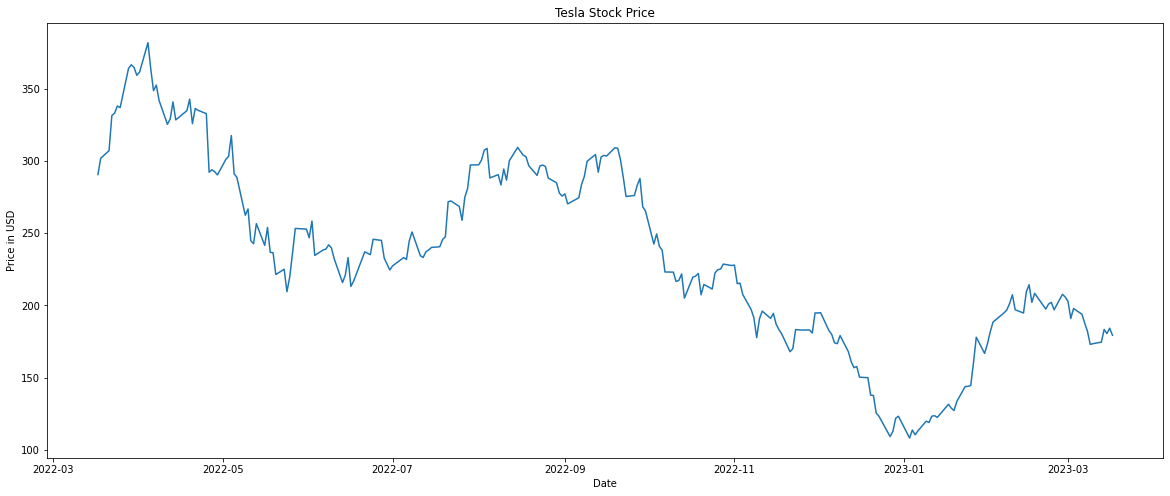

In [62]:
fig = plt.figure(figsize=(20,8))
plt.plot(tesla['Close'], label='Close')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

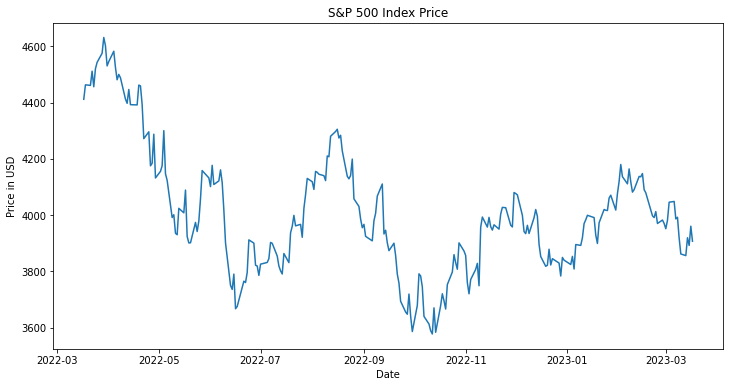

In [41]:
fig = plt.figure(figsize=(12, 6))
plt.plot(snp500['Close'], label='Close')
plt.title('S&P 500 Index Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

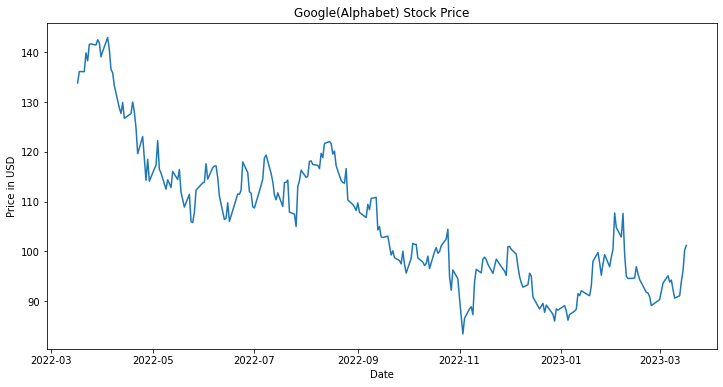

In [42]:
fig = plt.figure(figsize=(12, 6))
plt.plot(google['Close'], label='Close')
plt.title('Google(Alphabet) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

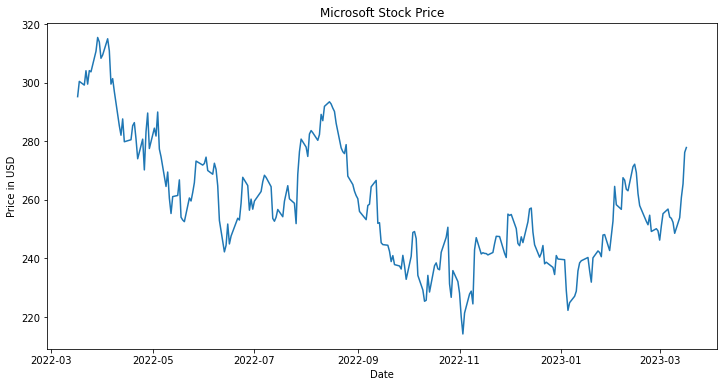

In [43]:
fig = plt.figure(figsize=(12, 6))
plt.plot(microsoft['Close'], label='Close')
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [44]:
# Calculating EMAs, MACD & Signal 

def calculate_shortEMA(df):
    ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#     print(ShortEMA)
    return ShortEMA

def calculate_longEMA(df):
    LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#     print(LongEMA)
    return LongEMA

def calculate_MACD(df):
    MACD = calculate_longEMA(df) - calculate_shortEMA(df)
#     print(MACD)
    return MACD

def calculate_signal(df):
    signal = calculate_MACD(df).ewm(span=9, adjust=False).mean()
#     print(signal)
    return signal

def histogram(df):
    histo  = calculate_MACD(df) - calculate_signal(df)
#     print(histo)
    return histo

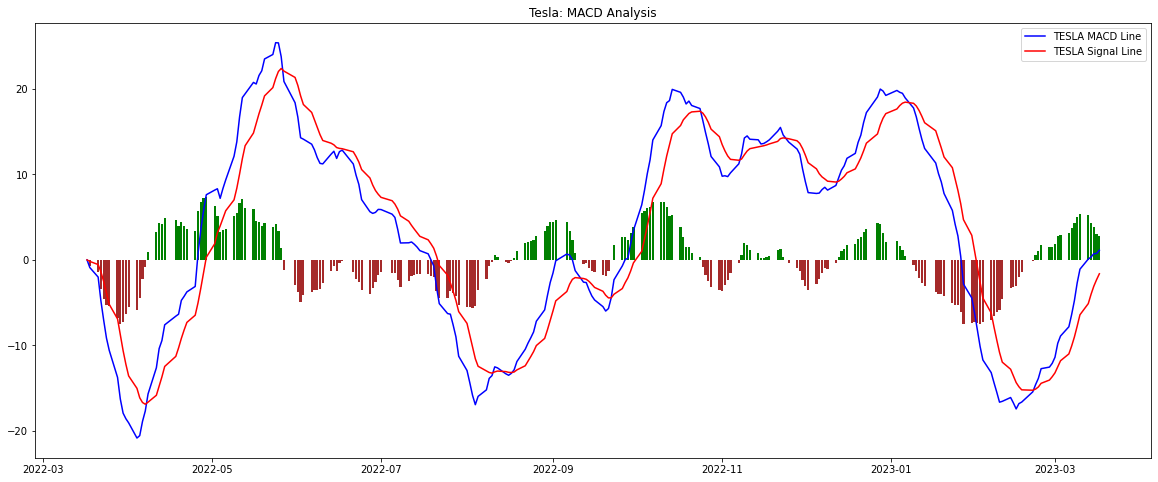

In [45]:
fig = plt.figure(figsize=(20, 8))
plt.plot(tesla.index, calculate_MACD(tesla), label = "TESLA MACD Line", color = 'blue')
plt.plot(tesla.index, calculate_signal(tesla), label = 'TESLA Signal Line', color = 'red')

for i in range(len(tesla)):
        if str(histogram(tesla)[i])[0] == '-':
            plt.bar(tesla.index[i], histogram(tesla)[i], color = 'brown')#'#ef5350')
        else:
            plt.bar(tesla.index[i], histogram(tesla)[i], color = 'green')#'#26a69a')
            
plt.legend(loc='upper right')
plt.title("Tesla: MACD Analysis")
plt.show()

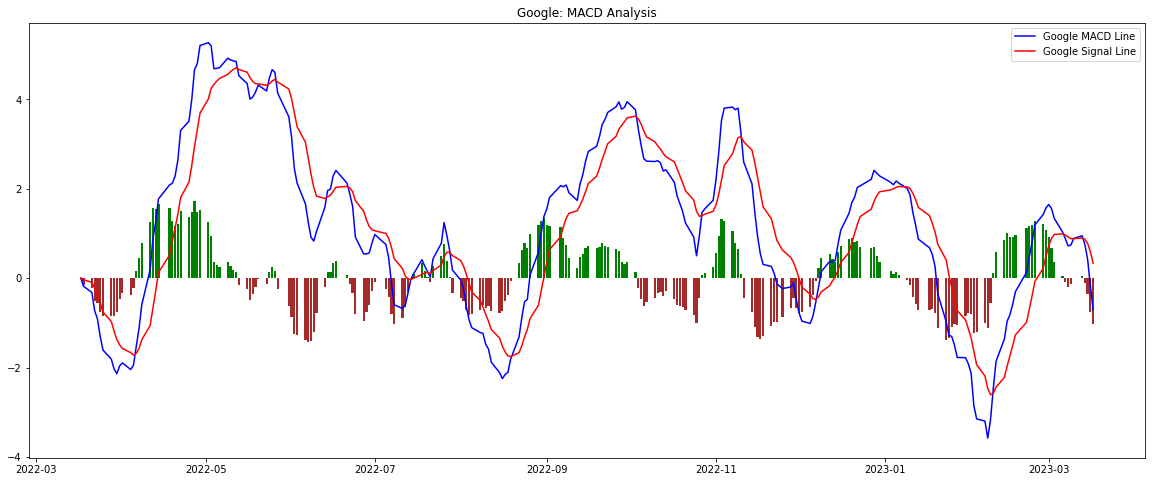

In [46]:
fig = plt.figure(figsize=(20, 8))
plt.plot(google.index, calculate_MACD(google), label = "Google MACD Line", color = 'blue')
plt.plot(google.index, calculate_signal(google), label = 'Google Signal Line', color = 'red')

for i in range(len(google)):
        if str(histogram(google)[i])[0] == '-':
            plt.bar(google.index[i], histogram(google)[i], color = 'brown')#'#ef5350')
        else:
            plt.bar(google.index[i], histogram(google)[i], color = 'green')#'#26a69a')
            
plt.legend(loc='upper right')
plt.title("Google: MACD Analysis")
plt.show()

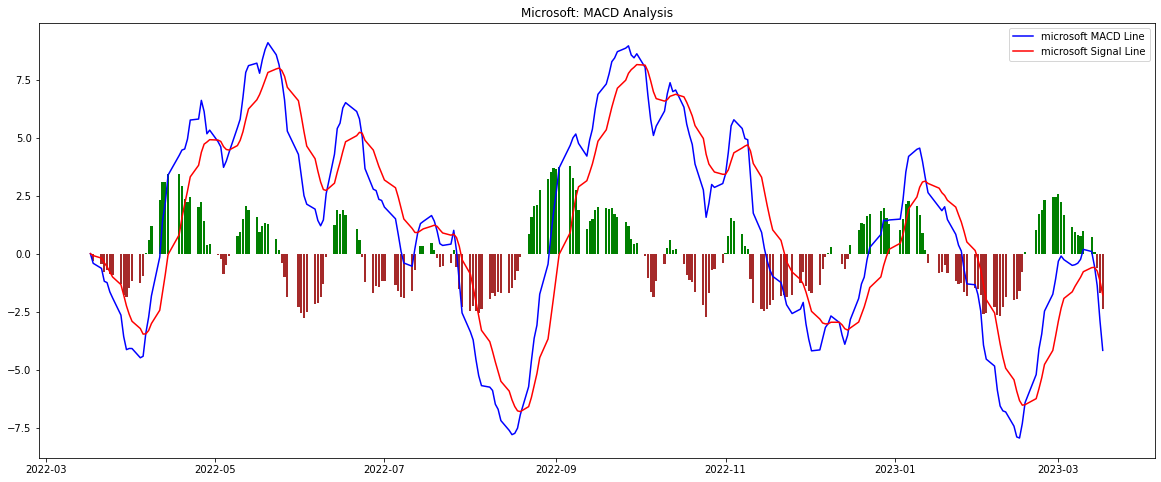

In [47]:
fig = plt.figure(figsize=(20, 8))
plt.plot(microsoft.index, calculate_MACD(microsoft), label = "microsoft MACD Line", color = 'blue')
plt.plot(microsoft.index, calculate_signal(microsoft), label = 'microsoft Signal Line', color = 'red')

for i in range(len(microsoft)):
        if str(histogram(microsoft)[i])[0] == '-':
            plt.bar(microsoft.index[i], histogram(microsoft)[i], color = 'brown')#'#ef5350')
        else:
            plt.bar(microsoft.index[i], histogram(microsoft)[i], color = 'green')#'#26a69a')
            
plt.legend(loc='upper right')
plt.title("Microsoft: MACD Analysis")
plt.show()

In [48]:
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-17,276.996674,291.666656,275.239990,290.533325,290.533325,66582900
2022-03-18,291.496674,302.616669,289.130005,301.796661,301.796661,100414200
2022-03-21,304.993347,314.283325,302.363342,307.053345,307.053345,81981600
2022-03-22,310.000000,332.619995,307.250000,331.326660,331.326660,105868500
2022-03-23,326.646667,346.899994,325.466675,333.036682,333.036682,120676200
...,...,...,...,...,...,...
2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900
2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600


In [49]:
tesla['MACD'] = calculate_MACD(tesla)
tesla['Signal Line'] = calculate_signal(tesla)
microsoft['MACD'] = calculate_MACD(microsoft)
microsoft['Signal Line'] = calculate_signal(microsoft)
google['MACD'] = calculate_MACD(google)
google['Signal Line'] = calculate_signal(google)
google

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2022-03-17,133.149002,134.080505,132.184998,133.839005,133.839005,28264000,0.000000,0.000000
2022-03-18,133.424500,136.244003,132.258499,136.125504,136.125504,44566000,-0.182399,-0.036480
2022-03-21,136.163498,137.050003,134.092499,136.101501,136.101501,26832000,-0.321310,-0.093446
2022-03-22,136.101501,141.050003,136.101501,139.867996,139.867996,35496000,-0.726944,-0.220146
2022-03-23,138.702499,139.588501,137.835007,138.275497,138.275497,25154000,-0.909427,-0.358002
...,...,...,...,...,...,...,...,...
2023-03-13,90.089996,92.570000,89.419998,91.110001,91.110001,37335600,0.948914,0.896124
2023-03-14,92.559998,94.360001,92.440002,93.970001,93.970001,36050200,0.759903,0.868880
2023-03-15,93.220001,96.930000,92.639999,96.110001,96.110001,50622100,0.432447,0.781593


In [57]:
def buy_sell(dataframe):
    Buy = []
    Sell = []
    Flag = -1 
            
    for i in range(0, len(dataframe)):
        # Go through each row to tell if the MACD line crosses the Signal Line
        if dataframe['MACD'][i] > dataframe['Signal Line'][i]:
            Sell.append(np.nan)
            if Flag != 1:
                Buy.append(dataframe['Close'][i])
                Flag = 1 #indicates we have been here
            else:
                Buy.append(np.nan)
                
        elif dataframe['MACD'][i] < dataframe['Signal Line'][i]:
            Buy.append(np.nan)
            if Flag != 0:
                Sell.append(dataframe['Close'][i])
                Flag = 0 #indicates we have been here
            else:
                Sell.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)
            
    return (Sell, Buy)

tesla_signal = buy_sell(tesla)
tesla['Buy_Signal_Price'] = tesla_signal[0]
tesla['Sell_Signal_Price'] = tesla_signal[1]

microsoft_signal = buy_sell(microsoft)
microsoft['Buy_Signal_Price'] = microsoft_signal[0]
microsoft['Sell_Signal_Price'] = microsoft_signal[1]

google_signal = buy_sell(google)
google['Buy_Signal_Price'] = google_signal[0]
google['Sell_Signal_Price'] = google_signal[1]

google

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2022-03-17,133.149002,134.080505,132.184998,133.839005,133.839005,28264000,0.000000,0.000000,NaN,NaN
2022-03-18,133.424500,136.244003,132.258499,136.125504,136.125504,44566000,-0.182399,-0.036480,136.125504,NaN
2022-03-21,136.163498,137.050003,134.092499,136.101501,136.101501,26832000,-0.321310,-0.093446,NaN,NaN
2022-03-22,136.101501,141.050003,136.101501,139.867996,139.867996,35496000,-0.726944,-0.220146,NaN,NaN
2022-03-23,138.702499,139.588501,137.835007,138.275497,138.275497,25154000,-0.909427,-0.358002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-13,90.089996,92.570000,89.419998,91.110001,91.110001,37335600,0.948914,0.896124,NaN,NaN
2023-03-14,92.559998,94.360001,92.440002,93.970001,93.970001,36050200,0.759903,0.868880,93.970001,NaN
2023-03-15,93.220001,96.930000,92.639999,96.110001,96.110001,50622100,0.432447,0.781593,NaN,NaN


In [58]:
google_signal

([nan,
  136.12550354003906,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  116.05049896240234,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  112.31649780273438,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  111.48750305175781,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  114.33999633789062,
  nan,
  nan,
  nan,
  nan,
  nan,
  116.31999969482422,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,


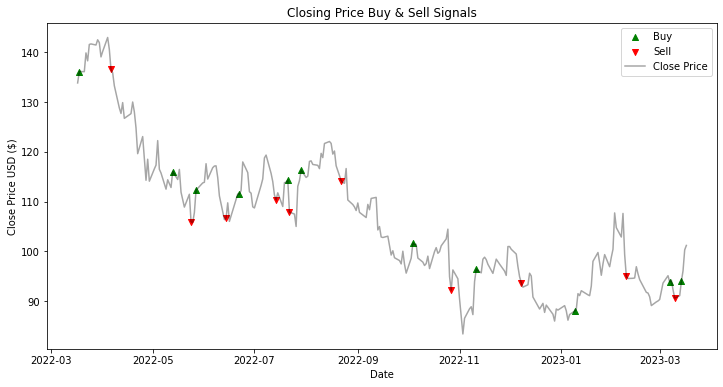

In [59]:
def plot_signals(dataframe):
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(dataframe.index, dataframe['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1)
    plt.scatter(dataframe.index, dataframe['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha = 1)
    plt.plot(dataframe['Close'], label='Close Price', color = 'black', alpha = 0.35)
    plt.title('Closing Price Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend(loc = 'upper right')
    plt.show()

plot_signals(google)

In [60]:
# constructing a Backtesting function

def backtesting(dataframe):
    # We will first need to extract out the index of each Buy & Sell price 
    # This is needed to get the 'Opening Price' of the next day - when the actual trade takes place
    Buy = []
    Sell = []
    
    for i in range(len(dataframe['Buy_Signal_Price'])):
               if not np.isnan(dataframe['Buy_Signal_Price'][i]):
                   Buy.append(i)
                    
    for i in range(len(dataframe['Sell_Signal_Price'])):
               if not np.isnan(dataframe['Sell_Signal_Price'][i]):
                   Sell.append(i)
                                
    Realbuys = [i+1 for i in Buy] 
    Realsells = [i+1 for i in Sell]
    
    # We extract out the opening price for the day after the respective signals
    Buyprices = dataframe.Open.iloc[Realbuys]
    Sellprices = dataframe.Open.iloc[Realsells]
    
    # We will be dropping the signals if the selling signal is preceeded with no buying signal
    # Also applies for the signals if the buying signal is followed with no selling signal
    if Sellprices.index[0] < Buyprices.index[0]:
        Sellprices = Sellprices.drop(Sellprices.index[0])
    elif Buyprices.index[-1] > Sellprices.index[-1]:
        Buyprices = Buyprices.drop(Buyprices.index[-1])
        
    # we would now be calculating relative profits 
    relative_profits = []
    for i in range(len(Sellprices)):
        relative_profits.append((Sellprices[i] - Buyprices[i])/Buyprices[i])
        return sum(relative_profits)/len(relative_profits) * 100

print("The Algorithm was able to generate a {}% profit over the past year for Tesla"
      .format(round(backtesting(tesla), 2)))

print("The Algorithm was able to generate a {}% profit over the past year for Microsoft"
      .format(round(backtesting(microsoft), 2)))

print("The Algorithm was able to generate a {}% profit over the past year for Google"
      .format(round(backtesting(google), 2)))

The Algorithm was able to generate a 7.15% profit over the past year for Tesla
The Algorithm was able to generate a -0.75% profit over the past year for Microsoft
The Algorithm was able to generate a -0.11% profit over the past year for Google
